In [1]:
%matplotlib inline
import sys
sys.path.append("/home/diego/Dropbox/hold_noise/iclamp-glm/")

import matplotlib.pyplot as plt
import numpy as np

from icglm.processes import OUProcess, GeneralCov
# from icglm.signals import unband_matrix

from scipy.linalg import solveh_banded
from scipy.signal import fftconvolve

%load_ext autoreload
%autoreload 2

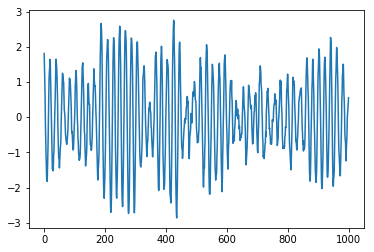

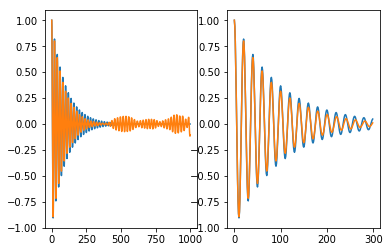

In [2]:
def autocorr(t, f, tau):
    return np.cos(2 * np.pi * f * t) * np.exp(-np.abs(t / tau))

dt = 1
t = np.arange(0, 1000, dt)
f = 1 / 20
tau = 100

npp = GeneralCov(mu=0, sd=1, autocorr_fun=autocorr, pars=dict(f=f, tau=tau), t_max_band=tau * 10)
npp.set_cov(t)
x = npp.sample(shape=(100,))

n = np.arange(1, x.shape[0] + 1, 1)
n = np.concatenate((n, n[:-1][::-1]))
autocor = fftconvolve(x, x[::-1], mode='full', axes=0)[::-1] / n[:, None]
autocor = autocor[len(t)-1:] / autocor[len(t)-1]
autocor = np.mean(autocor, 1)

fig, ax = plt.subplots()
ax.plot(t, x[:, 0])

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(t, autocorr(t, f, tau))
ax1.plot(t, autocor)

t_ = np.arange(0, 3 * tau, dt)
ax2.plot(t_, autocorr(t_, f, tau))
ax2.plot(t_, autocor[:len(t_)])

0.33264708518981934


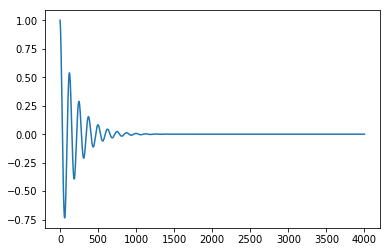

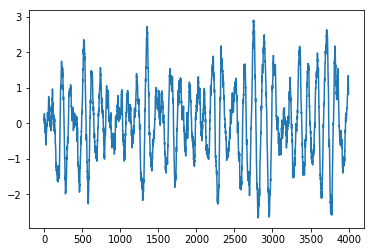

In [118]:
from scipy.linalg import cholesky_banded

dt = 1
t = np.arange(0, 4000, dt)
f = 8 / 1000
tau = 200
sd = 1

max_band = min(int(10*tau/dt), len(t))
cov = np.zeros((max_band, len(t)))
for v in range(max_band):
#     cov[v, :] = autocov(t[v], f, tau, sd)
    cov[v, :len(t)-v] = autocov(t[v], f, tau, sd)
                     
        
inv_cov = solveh_banded(cov, np.eye(len(t)), lower=True)
ch = cholesky_banded(cov, lower=True)
ch_upper = unband_matrix(ch, symmetric=False)

stim = ch_upper.T @ np.random.randn(len(t))

t0 = time.time()
y = solveh_banded(cov, stim, lower=True)
log_likelihood = - 1 / 2 * stim @ y
t1 = time.time()
print(t1 - t0)

log_likelihood = - 1 / 2 * stim @ y

plt.figure()
plt.plot(t, autocov(t, f, tau, sd))
plt.figure()
plt.plot(t, stim)

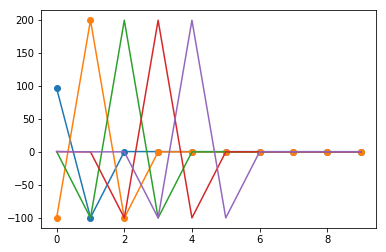

In [128]:
plt.figure()
plt.plot(inv_cov[0, :10], '-o')
plt.plot(inv_cov[1, :10], '-o')
plt.plot(inv_cov[2, :10])
plt.plot(inv_cov[3, :10])
plt.plot(inv_cov[4, :10])

In [92]:
# Ab = np.array([[0, 0, 1j, 2, 3j], [0, -1, -2, 3, 4], [9, 8, 7, 6, 9]])
# c = cholesky_banded(Ab)

unbanded_cov = unband_matrix(cov)
ch_upper = unband_matrix(ch, symmetric=False)

np.allclose(ch_upper.T @ ch_upper, unbanded_cov)
# np.allclose(unbanded_ch @ unbanded_ch.T, unbanded_cov)
# True

True

In [108]:
# np.diag(ch_upper)
ch_upper.T

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99375574, 0.1115775 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98505109, 0.13314123, 0.10930583, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.10198106, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10573513, 0.10198106,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10918143, 0.10573513,
        0.10198106]])

In [105]:
unbanded_cov

array([[1.        , 0.99375574, 0.98505109, ..., 0.00676216, 0.0067713 ,
        0.00676317],
       [0.99375574, 1.        , 0.99375574, ..., 0.00673558, 0.00676216,
        0.0067713 ],
       [0.98505109, 0.99375574, 1.        , ..., 0.00669148, 0.00673558,
        0.00676216],
       ...,
       [0.00676216, 0.00673558, 0.00669148, ..., 1.        , 0.99375574,
        0.98505109],
       [0.0067713 , 0.00676216, 0.00673558, ..., 0.99375574, 1.        ,
        0.99375574],
       [0.00676317, 0.0067713 , 0.00676216, ..., 0.98505109, 0.99375574,
        1.        ]])

In [88]:
unbanded_ch.T @ unbanded_ch

array([[1.        , 0.99375574, 0.98505109, ..., 0.00676216, 0.0067713 ,
        0.00676317],
       [0.99375574, 1.        , 0.99375574, ..., 0.00673558, 0.00676216,
        0.0067713 ],
       [0.98505109, 0.99375574, 1.        , ..., 0.00669148, 0.00673558,
        0.00676216],
       ...,
       [0.00676216, 0.00673558, 0.00669148, ..., 1.        , 0.99375574,
        0.98505109],
       [0.0067713 , 0.00676216, 0.00673558, ..., 0.99375574, 1.        ,
        0.99375574],
       [0.00676317, 0.0067713 , 0.00676216, ..., 0.98505109, 0.99375574,
        1.        ]])

In [68]:
unbanded_cov

array([[1.        , 0.99375574, 0.98505109, ..., 0.00676216, 0.0067713 ,
        0.00676317],
       [0.99375574, 1.        , 0.99375574, ..., 0.00673558, 0.00676216,
        0.0067713 ],
       [0.98505109, 0.99375574, 1.        , ..., 0.00669148, 0.00673558,
        0.00676216],
       ...,
       [0.00676216, 0.00673558, 0.00669148, ..., 1.        , 0.99375574,
        0.98505109],
       [0.0067713 , 0.00676216, 0.00673558, ..., 0.99375574, 1.        ,
        0.99375574],
       [0.00676317, 0.0067713 , 0.00676216, ..., 0.98505109, 0.99375574,
        1.        ]])